In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
from astroquery.mast import Observations
import lightkurve

Following LightKurve tutorial example to make sure things are working :

First, we start Python and use the search_targetpixelfile function to obtain the Kepler pixel data for the star from the data archive:

( http://docs.lightkurve.org/tutorials/)

Lets try this for GJ1243

In [2]:
from lightkurve import search_targetpixelfile
gj1243 = search_targetpixelfile(9726699).download_all()

In [3]:
gj1243

TargetPixelFileCollection of 15 objects:
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 
KeplerTargetPixelFile Object (ID: 9726699) 

In [4]:
#Looking just at quarter 1 in the Kepler data of GJ1243
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()

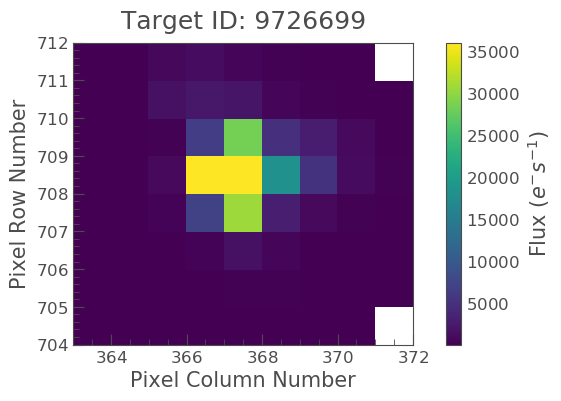

In [5]:
gj1243_q1.plot(frame=1)

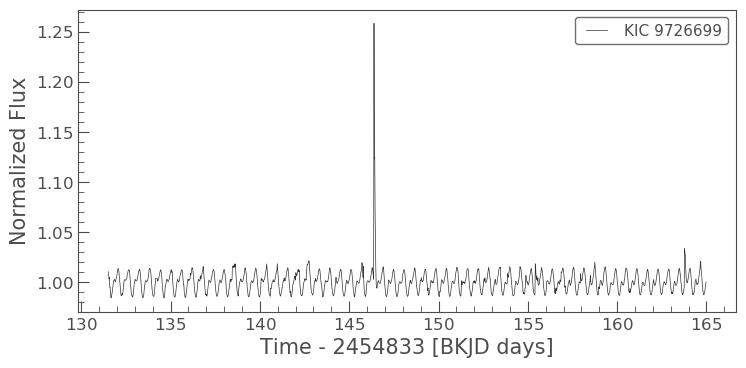

In [6]:
gj1243_q1_lc = gj1243_q1.to_lightcurve(aperture_mask='all');
gj1243_q1_lc.plot()

In [7]:
#when figuring where the flares are use a timestamp range (don't use ==)
#use short cadence data implement flag
#make the full light curve (stack the quarters)
#get rid of quarter to quarter variations

Following the tutorial for how to make a full light curve with all of the quarters of data

Now lets try this for GJ1243

In [4]:
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
gj1243_q1 = search_targetpixelfile(9726699,quarter=1).download()
target = '9726699'

In [5]:
print(target)
print(gj1243_q1)

9726699
KeplerTargetPixelFile Object (ID: 9726699)


In [25]:
lcf = search_lightcurvefile(9726699, quarter=2).download().PDCSAP_FLUX
print(lcf)

KeplerLightCurve(ID: 9726699)


In [41]:
gj1243_collection = search_lightcurvefile(target,cadence='short').download_all()
print (gj1243_collection)

LightCurveFileCollection of 11 objects:
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 
KeplerLightCurveFile(ID: 9726699) 



In [40]:
gj1243_collection[0].PDCSAP_FLUX

KeplerLightCurve(ID: 9726699)

In [42]:
gj1243lc = gj1243_collection[0].PDCSAP_FLUX

for q in range(1,len(gj1243_collection)):
    try:
        gj1243lc = gj1243lc.append(gj1243_collection[q].PDCSAP_FLUX)
    except:
            print(q)

In [44]:
print(len(gj1243_collection))

11


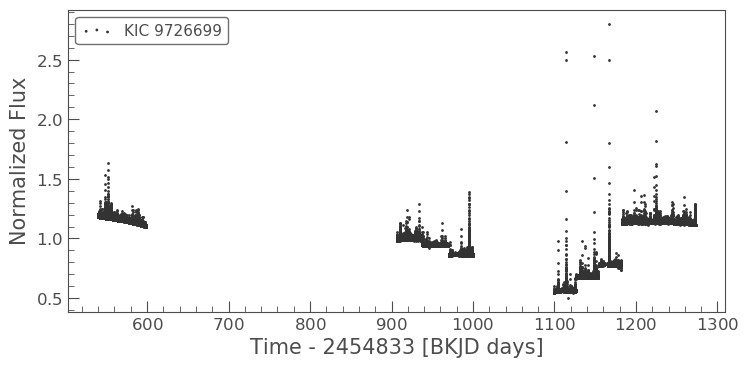

In [46]:
gj1243lc.scatter();

In [47]:
gj1243lc.flatten()

KeplerLightCurve(ID: 9726699)

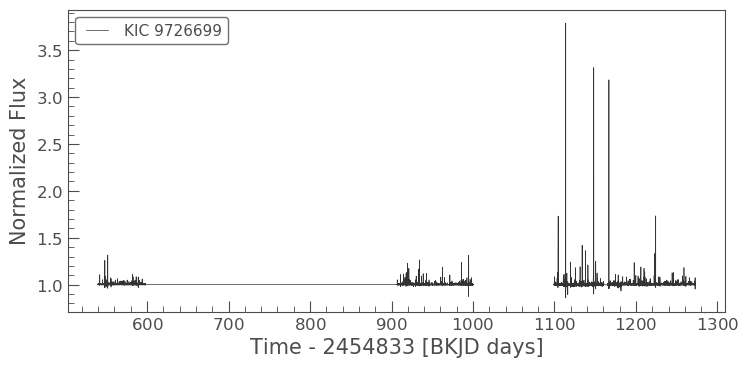

In [51]:
gj1243lc.flatten(window_length=).plot()